In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('Book1.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing['CHAS'].value_counts()

0    470
1     35
Name: CHAS, dtype: int64

In [5]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

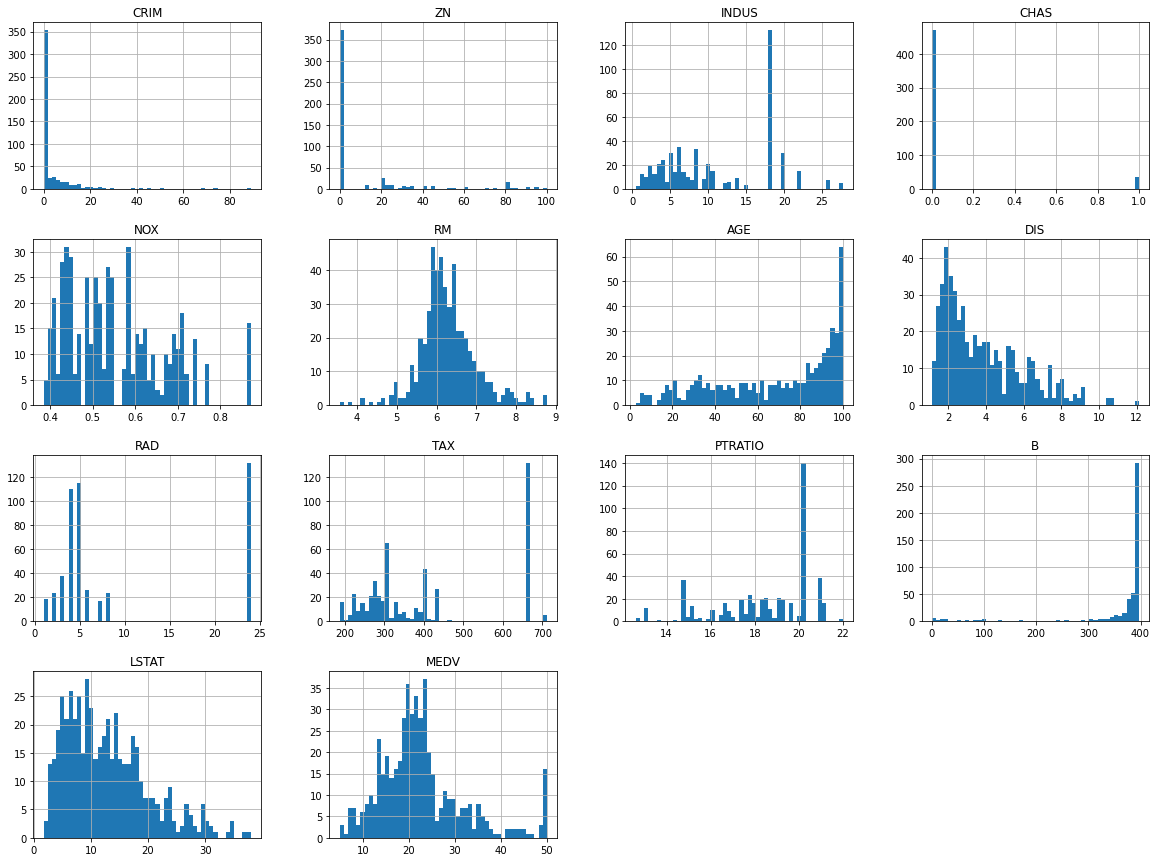

In [6]:
housing.hist(bins = 50,figsize=(20,15))

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [8]:
# import numpy as np
# def split_train_test(data,ratio):
#     np.random.seed(42)
#     suffeled = np.random.permutation(len(data))
#     test_set_size = int(len(data)*ratio)
#     training_indices = suffeled[test_set_size:]
#     test_indices = suffeled[:test_set_size]
#     return data.iloc[training_indices],data.iloc[test_indices]

In [9]:
# trainset,testset = split_train_test(housing,0.2)
# print(len(trainset))

In [10]:
# from sklearn.model_selection import train_test_split
# trainset,testset = train_test_split(housing,test_size=0.2,random_state=42)
# print(len(trainset))

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 42)
for trainset,testset in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[trainset]
    strat_test_set = housing.loc[testset]
housing = strat_train_set.copy()    
split.split(housing,housing['CHAS'])

<generator object BaseShuffleSplit.split at 0x0000019A6AB0E660>

In [12]:
strat_test_set['CHAS'].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

In [13]:
housing = strat_train_set.drop('MEDV',axis = 1)
housing_labels = strat_train_set['MEDV'].copy()

In [14]:
correlation_matrix = housing.corr() 
correlation_matrix['CHAS'].sort_values(ascending=False)

CHAS       1.000000
RM         0.114813
NOX        0.079589
AGE        0.062755
B          0.048388
INDUS      0.045634
ZN        -0.015708
RAD       -0.021940
TAX       -0.047445
CRIM      -0.062942
LSTAT     -0.079565
DIS       -0.091122
PTRATIO   -0.137222
Name: CHAS, dtype: float64

In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 215
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB


housing.plot(kind='scatter',x='MEDV',y='RM',alpha=.6)


## Cheaking correlation

In [16]:
# housing.plot(kind='scatter',x='MEDV',y='RM',alpha=.6)

In [17]:
# if correlation is nearest to zero then we can remove this attribute

In [18]:
# if any value is missing then we have 3 solutions - 
# 1) if it's correlation is tending to zero the simply delete this column
# 2) else simply put median of that column in place of null - 

# median = housing['attribute'].median()
# housing['attribute'].fillna(median)


# for this we have a module in sklearn

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
X = imputer.fit_transform(housing)
# X = imputer.transform(housing)
housing_tr = pd.DataFrame(X,columns= housing.columns)
# this housing_tr is a copy of housing and all the missing values were replace by the median of that colums

housing.info()

## Scikit learn design


In [19]:
# Primiarily three types of objects

# 1) Estimators - It estimates some parameters based on the dataset, eg - Imputer. It has a fit method and transform method,
#     Fit method - fits the dataset and canculates internal parameters.
    
# 2) Transformers - transform method takes input and returns output based on the learning from fit(). it also has a convinient function 
#     fit_transforn() which first fit and then transforms. 
    
# 3) Predictors - Linearregression model is an example of predictors. fit() and predict() are two common functions, it also gives score()
#     function which will evaluate the prediction.

## Feature scaling

  Primirarly two types of feature scaling method-
  1) Min-max scaling(Normalisation):
       (val-min)/(max-min)
       sklearn provides a class called MinMaxScalar for this
  2) Standardisation:
       (val-mean)/std
       class - StandardScalar

## creating a pipeline

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std-scalar',StandardScaler())
])

In [21]:
housing_num_tr = my_pipeline.fit_transform(housing_tr) #return a numpy array - we convert it into numpy array bcs predictors take value as numpy array


## Select  a desired model for dragon real estate

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model  = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [23]:
## let's try some predictions

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)
    
    

array([20.763, 27.226, 12.549, 20.842, 21.907])

In [24]:
some_labels

254    20.9
348    26.6
476    12.0
321    20.4
326    22.2
Name: MEDV, dtype: float64

In [25]:
prepared_data[0]

array([-0.44241248,  3.18716752, -1.12581552, -0.27288841, -1.42038605,
       -0.54601796, -1.7412613 ,  2.56284386, -0.99534776, -0.57387797,
       -0.99428207,  0.43852974, -0.49833679])

In [26]:
## Now calculating mean squared error for our predictoins...
import numpy as np
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels,housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.2095992248069052

In [27]:
# rmse of our model is 4.7.. which is very bad.. hence our model is bad 
#   this gives rmse = 0 because isne hamra trainig data dekh lia h ek baar jb hmne linear regression chlaya tha



## using better evaluation technique - cross validation

In [28]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,housing_num_tr,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-score)
rmse_scores

array([3.31007159, 2.53457207, 5.14806486, 2.75266741, 2.63988426,
       2.4257349 , 2.98738691, 3.02001812, 2.07071518, 4.60909919])

In [29]:
def printscore(rmse_scores):
    print(rmse_scores)
    print(rmse_scores.mean())
    print(rmse_scores.std())

In [30]:
printscore(rmse_scores)

[3.31007159 2.53457207 5.14806486 2.75266741 2.63988426 2.4257349
 2.98738691 3.02001812 2.07071518 4.60909919]
3.1498214475303077
0.9314747961229131


In descision tree:
    mean - 4.306859323563472
    std - 0.7274751432918937
In LinearRegression:
   mean -  4.9119466158041885
   std - 1.0579007793189035
   
In RendomForestRegressor:
   mean - 3.200822806415359
   std - 0.9710665153197314
   

  

## saving the model

In [31]:
from joblib import dump,load
dump(model,"dragon.joblib")

['dragon.joblib']

## Testing the model

In [32]:
X_test = strat_test_set.drop('MEDV',axis = 1)
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_prediction = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
176,0.05425,0.0,4.05,0,0.510,6.315,73.4,3.3175,5,296,16.6,395.60,6.29
284,0.01096,55.0,2.25,0,0.389,6.453,31.9,7.3073,1,300,15.3,394.72,8.23
223,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307,17.4,385.05,4.14
87,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50
261,0.52014,20.0,3.97,0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05302,0.0,3.41,0,0.489,7.079,63.1,3.4145,2,270,17.8,396.06,5.70
466,4.42228,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666,20.2,331.29,21.32
52,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243,16.8,396.90,8.43
504,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88


## now predict a value by giving our data




In [33]:
model = load('dragon.joblib')
input = np.array([[0.02731,0.0,7.07,0,4.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14]])
model.predict(input)

array([20.995])